In [2]:
#VADER means Valence Aware Dictionary and sEntiment Reasoner

import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [68]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [69]:
import pandas as pd
import numpy as np

data=pd.read_csv('moviereviews2.tsv',sep='\t')
data.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   6000 non-null   object
 1   review  5980 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


In [71]:
data.isnull().sum()

label      0
review    20
dtype: int64

In [72]:
data.dropna(inplace = True)
data.isnull().sum()

label     0
review    0
dtype: int64

In [73]:
data["label"].value_counts()

pos    2990
neg    2990
Name: label, dtype: int64

In [74]:
scores = []
for i in data["review"]:
  scores.append(analyzer.polarity_scores(i))

data["scores"] =scores
data.head()

,label,review,scores
0,pos,I loved this movie and will watch it again. Or...,"{'neg': 0.062, 'neu': 0.695, 'pos': 0.243, 'co..."
1,pos,"A warm, touching movie that has a fantasy-like...","{'neg': 0.033, 'neu': 0.783, 'pos': 0.184, 'co..."
2,pos,I was not expecting the powerful filmmaking ex...,"{'neg': 0.097, 'neu': 0.795, 'pos': 0.108, 'co..."
3,neg,"This so-called ""documentary"" tries to tell tha...","{'neg': 0.116, 'neu': 0.832, 'pos': 0.052, 'co..."
4,pos,This show has been my escape from reality for ...,"{'neg': 0.028, 'neu': 0.769, 'pos': 0.203, 'co..."


In [75]:
data["Compound"] = data["scores"].apply(lambda i:i["compound"])
data.head()

,label,review,scores,Compound
0,pos,I loved this movie and will watch it again. Or...,"{'neg': 0.062, 'neu': 0.695, 'pos': 0.243, 'co...",0.8720
1,pos,"A warm, touching movie that has a fantasy-like...","{'neg': 0.033, 'neu': 0.783, 'pos': 0.184, 'co...",0.9549
2,pos,I was not expecting the powerful filmmaking ex...,"{'neg': 0.097, 'neu': 0.795, 'pos': 0.108, 'co...",0.7201
3,neg,"This so-called ""documentary"" tries to tell tha...","{'neg': 0.116, 'neu': 0.832, 'pos': 0.052, 'co...",-0.9821
4,pos,This show has been my escape from reality for ...,"{'neg': 0.028, 'neu': 0.769, 'pos': 0.203, 'co...",0.9935


In [76]:
data["Result"] = data["Compound"].apply(lambda i: "pos" if i>0 else "neg")
data.head()

,label,review,scores,Compound,Result
0,pos,I loved this movie and will watch it again. Or...,"{'neg': 0.062, 'neu': 0.695, 'pos': 0.243, 'co...",0.8720,pos
1,pos,"A warm, touching movie that has a fantasy-like...","{'neg': 0.033, 'neu': 0.783, 'pos': 0.184, 'co...",0.9549,pos
2,pos,I was not expecting the powerful filmmaking ex...,"{'neg': 0.097, 'neu': 0.795, 'pos': 0.108, 'co...",0.7201,pos
3,neg,"This so-called ""documentary"" tries to tell tha...","{'neg': 0.116, 'neu': 0.832, 'pos': 0.052, 'co...",-0.9821,neg
4,pos,This show has been my escape from reality for ...,"{'neg': 0.028, 'neu': 0.769, 'pos': 0.203, 'co...",0.9935,pos


In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score : " ,accuracy_score(data["label"], data["Result"])*100)
print("confusion_matrix : ")
print(confusion_matrix(data["label"], data["Result"]))

accuracy_score :  73.22742474916389
confusion_matrix : 
[[1741 1249]
 [ 352 2638]]


In [78]:

print("classification_report :")
print(classification_report(data["label"], data["Result"]))


classification_report :
              precision    recall  f1-score   support

         neg       0.83      0.58      0.69      2990
         pos       0.68      0.88      0.77      2990

    accuracy                           0.73      5980
   macro avg       0.76      0.73      0.73      5980
weighted avg       0.76      0.73      0.73      5980



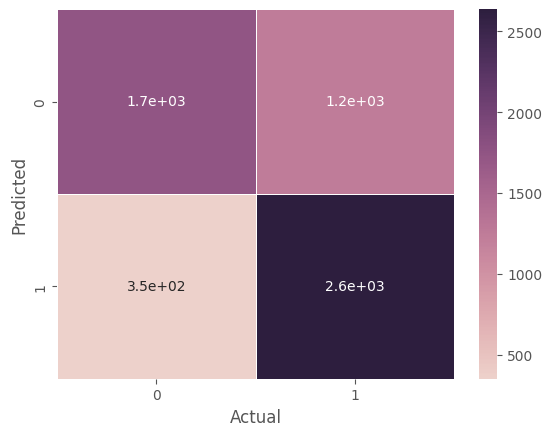

In [79]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
ax = sns.heatmap(confusion_matrix(data["label"], data["Result"]), annot =True, linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set(xlabel="Actual", ylabel="Predicted");

In [80]:
data[data["Result"] == "neg"]

,label,review,scores,Compound,Result
3,neg,"This so-called ""documentary"" tries to tell tha...","{'neg': 0.116, 'neu': 0.832, 'pos': 0.052, 'co...",-0.9821,neg
5,neg,Lately they have been trying to hock this film...,"{'neg': 0.254, 'neu': 0.6, 'pos': 0.145, 'comp...",-0.9800,neg
7,neg,"PLAN B has the appearance of a quickly made, u...","{'neg': 0.093, 'neu': 0.833, 'pos': 0.074, 'co...",-0.7551,neg
10,pos,I stumbled across this (Act-I) by pure dumb lu...,"{'neg': 0.119, 'neu': 0.807, 'pos': 0.075, 'co...",-0.7175,neg
13,neg,This movie was terrible. at first i just read ...,"{'neg': 0.191, 'neu': 0.707, 'pos': 0.102, 'co...",-0.9405,neg
...,...,...,...,...,...
5987,neg,Last weekend I bought this 'zombie movie' from...,"{'neg': 0.106, 'neu': 0.809, 'pos': 0.086, 'co...",-0.7954,neg
5988,neg,**** WARNING: here be spoilers **** Why do I w...,"{'neg': 0.091, 'neu': 0.825, 'pos': 0.084, 'co...",-0.2107,neg
5991,pos,Warning: contains a spoiler. Corny plot and in...,"{'neg': 0.248, 'neu': 0.697, 'pos': 0.055, 'co...",-0.9764,neg
5996,neg,Poor Whoopi Goldberg. Imagine her at a friend'...,"{'neg': 0.181, 'neu': 0.776, 'pos': 0.043, 'co...",-0.9578,neg


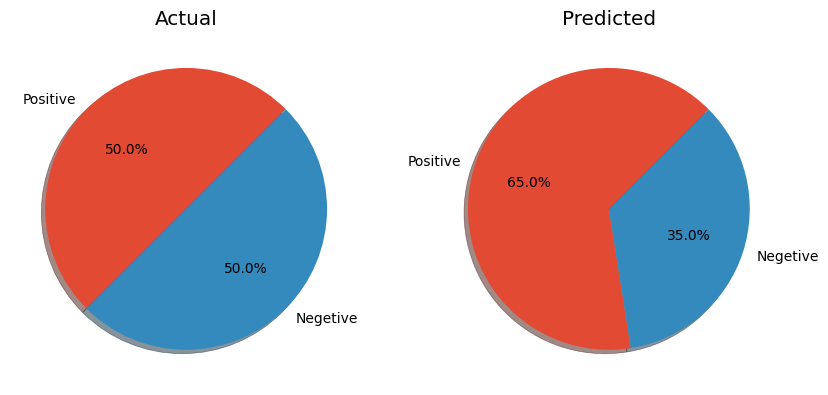

In [81]:
plt.figure(figsize = [10,10])
plt.subplot(1,2,1)
plt.pie(list(data["label"].value_counts()),  labels= ["Positive","Negetive"], autopct='%1.1f%%', shadow=True, startangle=45);
plt.title("Actual")

plt.subplot(1,2,2)
plt.pie(list(data["Result"].value_counts()),  labels= ["Positive","Negetive"], autopct='%1.1f%%', shadow=True, startangle=45);
plt.title("Predicted");